# Neural Networks visualisation

This notebook has been realised following guides: <br>
1) Piotr Skalski (https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795) <br>
2) StackOverFlow (https://stackoverflow.com/questions/29888233/how-to-visualize-a-neural-network)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score
from IPython.display import Image
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import imageio
import shutil
import keras
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.utils import to_categorical
import graphviz
from ann_visualizer.visualize import ann_viz;
import os
from matplotlib import pyplot
from math import cos, sin, atan

Using TensorFlow backend.


## ANN Keras Traning Model GIF 

In [2]:
# Creating a toy dataset
dataset_len = 100
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(2,2,dlen))
X_12 = pd.Series(np.random.normal(4,2,dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(1,3,dlen))
X_22 = pd.Series(np.random.normal(2,3,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
Y = pd.Series(np.repeat([0,1],dlen))
df = pd.concat([X_1, X_2, Y], axis=1)
df.columns = ['X1', 'X2', 'Y']

X = df.drop(['Y'], axis=1).values
y = df['Y']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.2)

X, y = X.T, y.values.reshape(1, y.shape[0])

In [3]:
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

In [26]:
# boundary of the graph
GRID_X_START = -7
GRID_X_END = 9
GRID_Y_START = -1.0
GRID_Y_END = 8.5
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "./binary_classification_vizualizations/ANN/"
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

In [28]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds[:,0].reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds[:,0].reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

In [29]:
def callback_keras_plot(epoch, logs):
    plot_title = "Keras Model - It: {:05}".format(epoch)
    file_name = "keras_model_{:05}.png".format(epoch)
    file_path = os.path.join(OUTPUT_DIR, file_name)
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    make_plot(X_test, y_test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs)

In [30]:
# Adding callback functions that they will run in every epoch
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=callback_keras_plot)

In [31]:
# Building a model
model = Sequential()
model.add(Dense(25, input_dim=2,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs= 118, callbacks=[testmodelcb])

Epoch 1/118
80/80 [==============================] - 0s 3ms/step - loss: 0.6941 - acc: 0.4875
Epoch 2/118
80/80 [==============================] - 0s 50us/step - loss: 0.6859 - acc: 0.5750
Epoch 3/118
80/80 [==============================] - 0s 50us/step - loss: 0.6807 - acc: 0.6375
Epoch 4/118
80/80 [==============================] - 0s 74us/step - loss: 0.6748 - acc: 0.6625
Epoch 5/118
80/80 [==============================] - 0s 87us/step - loss: 0.6696 - acc: 0.7125
Epoch 6/118
80/80 [==============================] - 0s 55us/step - loss: 0.6641 - acc: 0.7500
Epoch 7/118
80/80 [==============================] - 0s 55us/step - loss: 0.6597 - acc: 0.7375
Epoch 8/118
80/80 [==============================] - 0s 50us/step - loss: 0.6554 - acc: 0.7375
Epoch 9/118
80/80 [==============================] - 0s 56us/step - loss: 0.6533 - acc: 0.7375
Epoch 10/118
80/80 [==============================] - 0s 56us/step - loss: 0.6490 - acc: 0.7375
Epoch 11/118
80/80 [==============================

80/80 [==============================] - 0s 62us/step - loss: 0.5091 - acc: 0.8250
Epoch 87/118
80/80 [==============================] - 0s 49us/step - loss: 0.5066 - acc: 0.8125
Epoch 88/118
80/80 [==============================] - 0s 56us/step - loss: 0.5080 - acc: 0.8250
Epoch 89/118
80/80 [==============================] - 0s 56us/step - loss: 0.5057 - acc: 0.7875
Epoch 90/118
80/80 [==============================] - 0s 56us/step - loss: 0.5044 - acc: 0.8125
Epoch 91/118
80/80 [==============================] - 0s 55us/step - loss: 0.5042 - acc: 0.8250
Epoch 92/118
80/80 [==============================] - 0s 93us/step - loss: 0.5034 - acc: 0.8250
Epoch 93/118
80/80 [==============================] - 0s 56us/step - loss: 0.5029 - acc: 0.8250
Epoch 94/118
80/80 [==============================] - 0s 56us/step - loss: 0.5018 - acc: 0.8250
Epoch 95/118
80/80 [==============================] - 0s 56us/step - loss: 0.5023 - acc: 0.8250
Epoch 96/118
80/80 [==============================] -

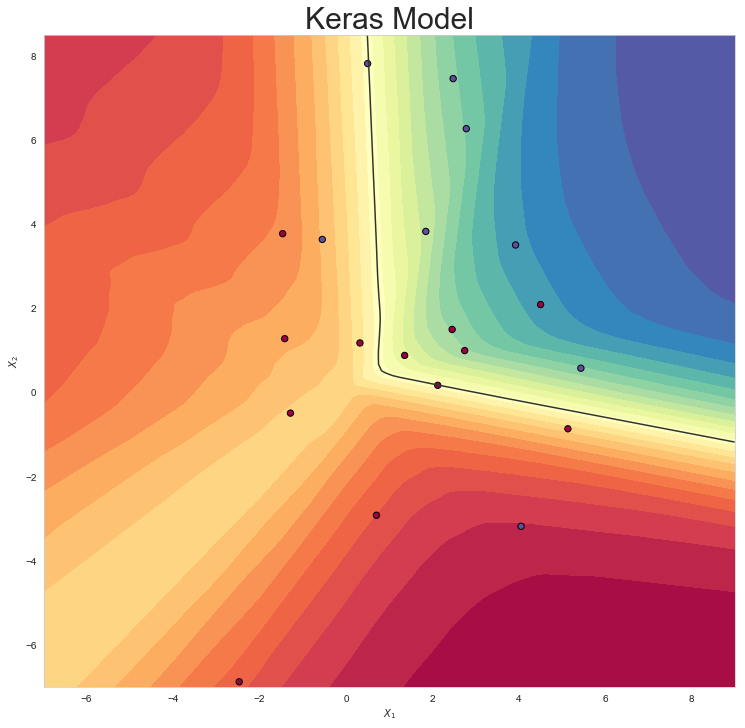

In [32]:
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
make_plot(X_test, y_test, "Keras Model", file_name=None, XX=XX, YY=YY, preds=prediction_probs)

In [33]:
input_folder = './binary_classification_vizualizations/ANN/'
save_filepath = './binary_classification_vizualizations/ANN/Keras_gif.gif'
make_gif(input_folder, save_filepath)

![](./binary_classification_vizualizations/ANN/Keras_gif.gif)

## Logistic Regression

In [41]:
# boundary of the graph
GRID_X_START = -7
GRID_X_END = 9
GRID_Y_START = -1.0
GRID_Y_END = 8
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "./binary_classification_vizualizations/Logistic_Regression/"
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

In [42]:
def callback_keras_plot2(epoch, logs):
    plot_title = "Logistic Model - It: {:05}".format(epoch)
    file_name = "logistic_model_{:05}.png".format(epoch)
    file_path = os.path.join(OUTPUT_DIR, file_name)
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    make_plot(X_test, y_test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs)

In [43]:
# Adding callback functions that they will run in every epoch
testmodelcb2 = keras.callbacks.LambdaCallback(on_epoch_end=callback_keras_plot2)

In [44]:
y_train2 = to_categorical(y_train)
 
model = Sequential()
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=2)) 
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train2, epochs= 118, callbacks=[testmodelcb2])

Epoch 1/118
80/80 [==============================] - 0s 3ms/step - loss: 1.2164 - acc: 0.3875
Epoch 2/118
80/80 [==============================] - 0s 50us/step - loss: 1.0999 - acc: 0.4375
Epoch 3/118
80/80 [==============================] - 0s 43us/step - loss: 1.0193 - acc: 0.4625
Epoch 4/118
80/80 [==============================] - 0s 68us/step - loss: 0.9622 - acc: 0.5500
Epoch 5/118
80/80 [==============================] - 0s 50us/step - loss: 0.9172 - acc: 0.5750
Epoch 6/118
80/80 [==============================] - 0s 43us/step - loss: 0.8799 - acc: 0.5875
Epoch 7/118
80/80 [==============================] - 0s 43us/step - loss: 0.8530 - acc: 0.6000
Epoch 8/118
80/80 [==============================] - 0s 43us/step - loss: 0.8310 - acc: 0.6250
Epoch 9/118
80/80 [==============================] - 0s 50us/step - loss: 0.8139 - acc: 0.6250
Epoch 10/118
80/80 [==============================] - 0s 50us/step - loss: 0.8006 - acc: 0.6125
Epoch 11/118
80/80 [==============================

80/80 [==============================] - 0s 50us/step - loss: 0.6231 - acc: 0.8000
Epoch 87/118
80/80 [==============================] - 0s 43us/step - loss: 0.6212 - acc: 0.8000
Epoch 88/118
80/80 [==============================] - 0s 50us/step - loss: 0.6203 - acc: 0.8000
Epoch 89/118
80/80 [==============================] - 0s 50us/step - loss: 0.6189 - acc: 0.8000
Epoch 90/118
80/80 [==============================] - 0s 43us/step - loss: 0.6178 - acc: 0.8000
Epoch 91/118
80/80 [==============================] - 0s 43us/step - loss: 0.6170 - acc: 0.8000
Epoch 92/118
80/80 [==============================] - 0s 37us/step - loss: 0.6161 - acc: 0.8000
Epoch 93/118
80/80 [==============================] - 0s 68us/step - loss: 0.6153 - acc: 0.8000
Epoch 94/118
80/80 [==============================] - 0s 56us/step - loss: 0.6145 - acc: 0.8000
Epoch 95/118
80/80 [==============================] - 0s 43us/step - loss: 0.6133 - acc: 0.8000
Epoch 96/118
80/80 [==============================] -

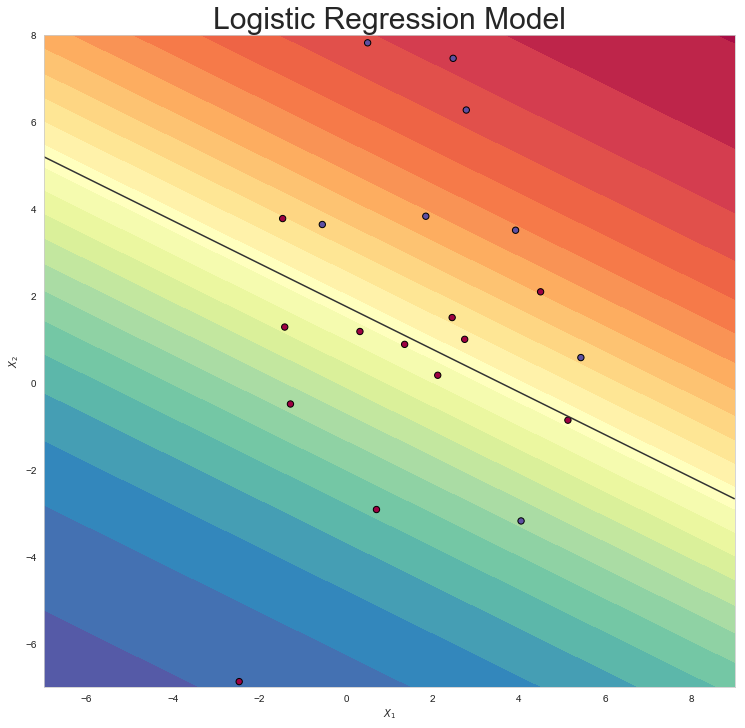

In [45]:
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
make_plot(X_test, y_test, "Logistic Regression Model", file_name=None, XX=XX, YY=YY, preds=prediction_probs)

In [46]:
input_folder = './binary_classification_vizualizations/Logistic_Regression'
save_filepath = './binary_classification_vizualizations/Logistic_Regression/Logistic_gif.gif'
make_gif(input_folder, save_filepath)

![](./binary_classification_vizualizations/Logistic_Regression/Logistic_gif.gif)

## ann_visualizer to visualize Neural Networks Architectures

In [15]:
os.environ["PATH"] += os.pathsep + 'C:/Users/hp/Anaconda3/Library/bin/graphviz/'

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ann_viz(model, title="My graph")

Epoch 1/150
80/80 [==============================] - 0s 4ms/step - loss: 0.7447 - acc: 0.5625
Epoch 2/150
80/80 [==============================] - 0s 118us/step - loss: 0.7303 - acc: 0.5875
Epoch 3/150
80/80 [==============================] - 0s 118us/step - loss: 0.7180 - acc: 0.6000
Epoch 4/150
80/80 [==============================] - 0s 118us/step - loss: 0.7064 - acc: 0.6125
Epoch 5/150
80/80 [==============================] - 0s 118us/step - loss: 0.6949 - acc: 0.6125
Epoch 6/150
80/80 [==============================] - 0s 118us/step - loss: 0.6840 - acc: 0.6250
Epoch 7/150
80/80 [==============================] - 0s 118us/step - loss: 0.6735 - acc: 0.6250
Epoch 8/150
80/80 [==============================] - 0s 112us/step - loss: 0.6642 - acc: 0.6250
Epoch 9/150
80/80 [==============================] - 0s 384us/step - loss: 0.6551 - acc: 0.6500
Epoch 10/150
80/80 [==============================] - 0s 174us/step - loss: 0.6466 - acc: 0.6500
Epoch 11/150
80/80 [=====================

80/80 [==============================] - 0s 155us/step - loss: 0.4556 - acc: 0.8375
Epoch 86/150
80/80 [==============================] - 0s 192us/step - loss: 0.4561 - acc: 0.8375
Epoch 87/150
80/80 [==============================] - 0s 143us/step - loss: 0.4557 - acc: 0.8375
Epoch 88/150
80/80 [==============================] - 0s 130us/step - loss: 0.4544 - acc: 0.8375
Epoch 89/150
80/80 [==============================] - 0s 136us/step - loss: 0.4545 - acc: 0.8375
Epoch 90/150
80/80 [==============================] - 0s 155us/step - loss: 0.4550 - acc: 0.8375
Epoch 91/150
80/80 [==============================] - 0s 155us/step - loss: 0.4538 - acc: 0.8375
Epoch 92/150
80/80 [==============================] - 0s 143us/step - loss: 0.4538 - acc: 0.8375
Epoch 93/150
80/80 [==============================] - 0s 143us/step - loss: 0.4532 - acc: 0.8375
Epoch 94/150
80/80 [==============================] - 0s 143us/step - loss: 0.4533 - acc: 0.8375
Epoch 95/150
80/80 [=======================

## Neural Network Architecture Visualizer

In [16]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment,
                                                                                    neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure(figsize=(15,15))
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

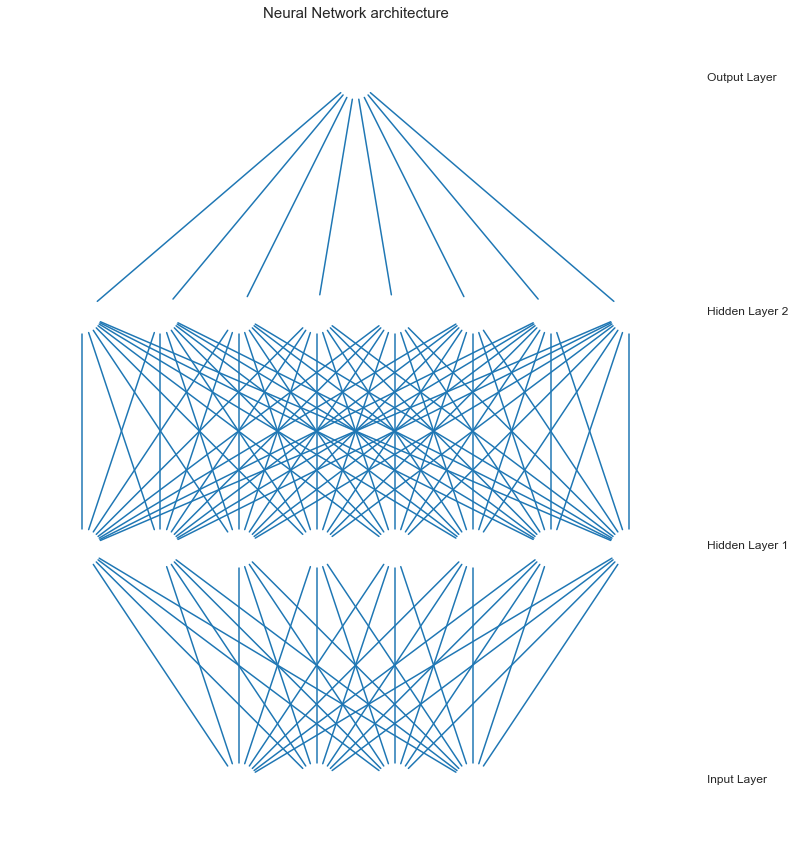

In [17]:
network = DrawNN( [4,8,8,1] )
network.draw()